In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (20,20)

import seaborn as sns
sns.set_theme(style="whitegrid")


In [2]:
#loading data

train_0 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/0*.png')]
train_1 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/1*.png')]
train_2 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/2*.png')]
train_3 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/3*.png')]
train_4 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/4*.png')]
train_5 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/5*.png')]
train_6 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/6*.png')]
train_7 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/7*.png')]
train_8 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/8*.png')]
train_9 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Train/9*.png')]

In [3]:
test_0 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/0*.png')]
test_1 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/1*.png')]
test_2 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/2*.png')]
test_3 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/3*.png')]
test_4 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/4*.png')]
test_5 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/5*.png')]
test_6 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/6*.png')]
test_7 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/7*.png')]
test_8 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/8*.png')]
test_9 = [cv2.imread(file) for file in glob.glob('./P2/dataset/c/Test/9*.png')]


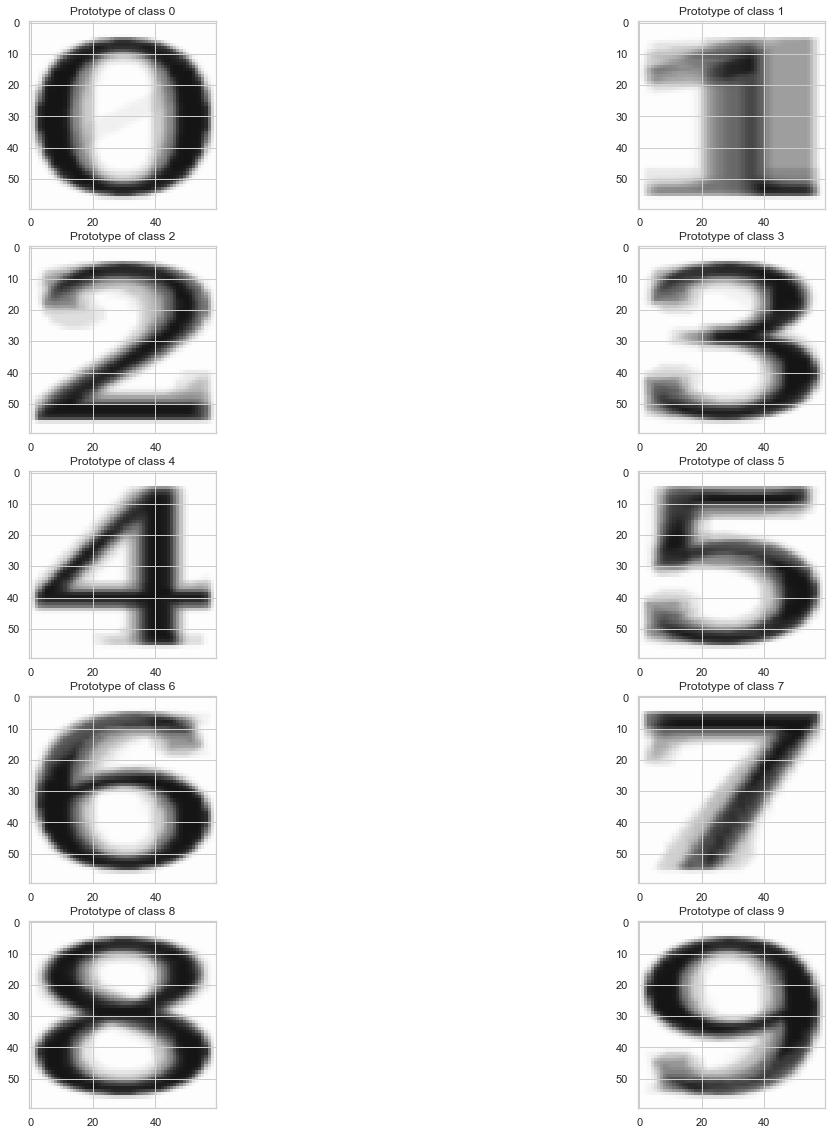

In [4]:
PlotIndex = 1

# generate a prototype of each class based on average pixels value and plot prototype that obtained 
def Prototype(image_collection,label):
    global PlotIndex
    # empty image for prototype
    Prototaype_ = np.full(image_collection[0].shape,255, dtype = np.uint8)
    
    for row in range(image_collection[0].shape[0]):
        for col in range(image_collection[0].shape[1]):
            for color in range(image_collection[0].shape[2]):
                value = 0
                for image in image_collection :
                    value += image[row][col][color]
                value /= len(image_collection)
                Prototaype_[row][col][color] = value
    plt.subplot(5, 2, PlotIndex)
    plt.imshow(Prototaype_)
    plt.title("Prototype of class {0}".format(label))
    PlotIndex += 1
    return Prototaype_


Prototypes = [Prototype(train_0,0),Prototype(train_1,1),Prototype(train_2,2),Prototype(train_3,3),
             Prototype(train_4,4),Prototype(train_5,5),Prototype(train_6,6),Prototype(train_7,7),
             Prototype(train_8,8),Prototype(train_9,9)]

Tests = [test_0,test_1,test_2,test_3,test_4,test_5,test_6,test_7,test_8,test_9]

plt.show()

In [5]:
#minimum distance classifier based on pixel brightness distnace from prototypes 
def MinDisClass(element,Prototypes):
    results = [0]*len(Prototypes)
    index = 0
    for proto in Prototypes:
        error = 0
        for row in range(proto.shape[0]):
            for col in range(proto.shape[1]):
                color_pro = 0
                color_elem = 0
                for color in range(proto.shape[2]):
                    color_pro += proto[row][col][color]
                    color_elem += element[row][col][color]
                
                # if a pixel birthness(sum of both RGB) distance from a prototype is greater than 300 (255*3 possible), 
                # then it is a error pixel
                # change 300 it will causes that MDC works better or worse
                if abs(color_pro - color_elem) > 300 :
                    error +=1
                    
        results[index] = error
        index += 1
    return results.index(min(results))
        

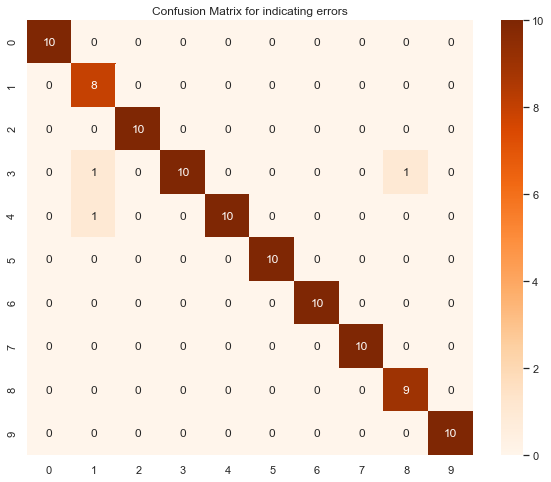

In [6]:
# Plotting Confusion Matrix and evaluate test samples
plt.rcParams["figure.figsize"] = (10,8)
CM = np.full((10,10),0, dtype = np.uint8)
for _ in range(len(Tests)) :
    for test_element in Tests[_]: 
        CM[MinDisClass(test_element,Prototypes)][_] +=1

sns.heatmap(CM, annot=True, cmap='Oranges')
plt.title("Confusion Matrix for indicating errors")
plt.show()